In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer

In [2]:
hr = pd.read_csv('/Users/zaki/Downloads/hr-analytic.csv')
hr

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
hr.isna().sum()*100/len(hr)

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

### Yang menjadi target adalah:
- 0 = Tidak menyediakan training
- 1 = Menyediakan training

In [5]:
hr['target'] = np.where(hr['target'] == 1.0, 'Move', 'Stay')
hr['target'].value_counts()

Stay    14381
Move     4777
Name: target, dtype: int64

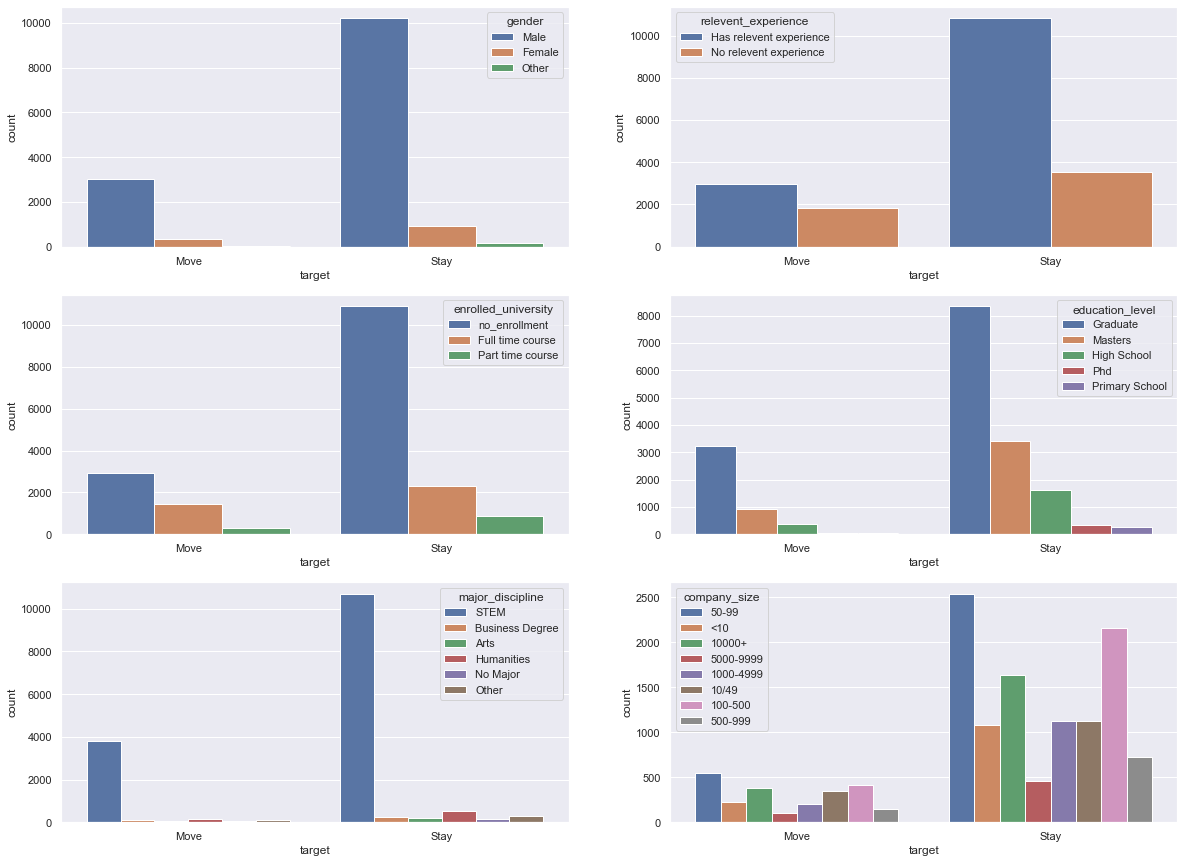

In [6]:
plt.figure(figsize=[20,15])
sns.set_theme(style="darkgrid")
plt.subplot(321)
sns.countplot(x=hr['target'],hue=hr['gender'])
plt.subplot(322)
sns.countplot(x=hr['target'],hue=hr['relevent_experience'])
plt.subplot(323)
sns.countplot(x=hr['target'],hue=hr["enrolled_university"])
plt.subplot(324)
sns.countplot(x=hr['target'],hue=hr['education_level'])
plt.subplot(325)
sns.countplot(x=hr['target'],hue=hr['major_discipline'])
plt.subplot(326)
sns.countplot(x=hr['target'],hue=hr["company_size"])
plt.show()

# Summary

- **Gender**: Mayoritas yang stay pada perusahaannya adalah Male. Walaupun yg memutuskan untuk pindah mencari pekerjaan juga mayoritasnya Male.

- **Relevant Experience**: Perusahaan lebih menyukai memiliki karyawan yg sudah memiliki pengalaman serupa, walaupun tidak menutup kemungkinan, ada perusahaan yg masih mau menerima karyawan dengan non-pengalaman (fresh graduate atau lintas ilmu). Sedangkan karyawan yang memilih untuk ganti pekerjaan baru juga yang sudah memiliki pengalaman serupa. Ada faktor yang membuat karyawan memutuskan untuk pindah, seperti mendapatkan tawaran yang lebih menarik dari tempat lain atau pekerjaannya tidak di apresiasi dengan baik.

- **Enrolled University**: Perusahaan lebih senang ketika karyawan tidak memiliki kepentingan akan pendidikan, dapat dilihat dari jumlah nya, mayoritas sedang tidak dalam menempuh studi apapun. Itu artinya kawayawan tidak memiliki tanggung jawab apapun selain job desk nya. Sedangkan ada juga perusahaan yang memiliki karyawan yg masih menjalani studi (fulltime course), kemungkinan pelajar tingkat akhir. Ada juga perusahaan yang memiliki karyawan yg menjalani kursus (part time course), namun tidak banyak. Sedangkan yang memilih ganti pekerjaan juga paling banyak yang tidak sedang melanjutkan studi apapun.

- **Education Level**: Umumnya, karyawan yang sudah bekerja memiliki background S1 atau Graduate. Walaupun dengan background Masters atau S2 juga cukup banyak, bahkan yang memiliki background Primary School. Biasanya, yang memiliki background Primary School akan bertahan di satu tempat karena ada kemungkinan kesulitan jika ganti pekerjaan baru, lain hal dengan karyawan yang memiliki background Graduate. Sama hal nya dengan karyawan yang memiliki background Phd, karena ada kemungkinan rate salary yang sudah cukup tinggi, membuat perusahaan tidak mau atau tidak mampu memberikan gaji sesuai rate nya.

- **Major Discipline**: Dalam konteks data scientist, yang memiliki latar belakang bidang STEM akan lebih di utamakan untuk di banding bidang lain. Tentu saja karena kesesuaian bidang ilmu dengan bidang pekerjaan yang akan dijalani, walau tidak menutup kemungkinan dari lintas ilmu lain juga memiliki kemampuan serupa, bisa jadi lebih baik secara kualitas. Sedangkan dengan latar belakang lain memilih untuk tidak ganti pekerjaan karena ada kemungkinan tidak mendapatkan yang lebih baik dari sebelumnya.

- **Company Size**: Dengan jumlah karyawan hanya sebanyak 50-99 karyawan, tentunya membuat beban pekerjaan semakin tinggi. Dengan tidak banyaknya jumlah karyawan, ada kemungkinan karyawan di berikan pekerjaan yang bukan bidangnya. Bisa jadi, ini salah satu alasan karyawan memutuskan untuk ganti pekerjaan. Untuk yang memutuskan menetap, ada kemungkinan terjalin rasa kekeluargaan karena jumlah karyawan yang tidak terlalu banyak.

In [7]:
hr['training_hours'].sort_values(ascending = False).unique()

array([336, 334, 332, 330, 328, 326, 324, 322, 320, 316, 314, 312, 310,
       308, 306, 304, 302, 300, 298, 294, 292, 290, 288, 286, 284, 282,
       280, 278, 276, 272, 270, 268, 266, 264, 262, 260, 258, 256, 254,
       250, 248, 246, 244, 242, 240, 238, 236, 234, 232, 228, 226, 224,
       222, 220, 218, 216, 214, 212, 210, 206, 204, 202, 200, 198, 196,
       194, 192, 190, 188, 184, 182, 180, 178, 176, 174, 172, 170, 168,
       167, 166, 165, 164, 163, 162, 161, 160, 158, 157, 156, 155, 154,
       153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141,
       140, 139, 138, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127,
       126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 114, 113,
       112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,
        99,  98,  97,  96,  95,  94,  92,  91,  90,  89,  88,  87,  86,
        85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,  73,
        72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  6

In [8]:
def training_hours(value):
    if value > 200:
        result='high'
    elif value < 100:
        result='low'
    else:
        result='medium'
    return result

In [9]:
hr['training_hours']= hr['training_hours'].apply(training_hours)

In [11]:
hr['training_hours'].value_counts()

low       15177
medium     3179
high        802
Name: training_hours, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

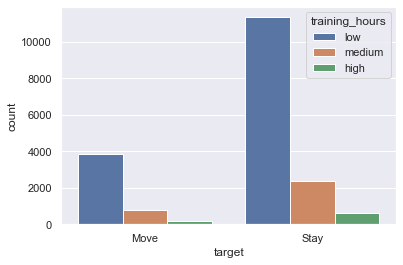

In [10]:
sns.countplot(data= hr, x= 'target', hue= 'training_hours')